# Multi-Class Classification Model for Wine Quality Using Python
### David Lowe
### July 20, 2018

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery. https://machinelearningmastery.com/

SUMMARY: The purpose of this project is to construct a prediction model using various machine learning algorithms and to document the end-to-end steps using a template. The Wine Quality dataset is a multi-class classification situation where we are trying to predict one of the three possible outcomes (cheap, average, and good).

INTRODUCTION: The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). The goal is to model wine quality based on physicochemical tests.

From the previous iteration, we approached the dataset as a regression problem and tried to predict the wine quality (a continuous numeric variable) with the least amount of mean squared error. While regression is one approach for assessing the wine quality, expressing quality in pure numbers and fractions are difficult for people to grasp fully.

For this iteration of the project, we will approach this dataset as a multi-class problem and attempt to classify the wine quality into one of the three rating categories: 1-Good (quality 7 or above), 2-Average (quality of 5-6), and 3-Cheap (quality 4 or below).

CONCLUSION: The baseline performance of the ten algorithms achieved an average accuracy of 78.22%. Three ensemble algorithms (Bagged Decision Trees, Random Forest, and Extra Trees) achieved the top accuracy scores after the first round of modeling. After a series of tuning trials, Extra Trees turned in the top result using the training data. It achieved an average accuracy of 84.78%. With the optimized tuning parameter available, the Extra-Trees algorithm processed the validation dataset with an accuracy of 86.00%, which was even better than the accuracy of the training data.

For this project, predicting whether a bottle of wine would be good, average, or cheap appears to be more intuitive than to predict simply a numerical quality score. The Extra Trees ensemble algorithm yielded consistently top-notch training and validation results, which warrant the additional processing required by the algorithm.

Dataset Used: Wine Quality Data Set

Dataset ML Model: Regression with numerical attributes

Dataset Reference: https://archive.ics.uci.edu/ml/datasets/wine+quality

One potential source of performance benchmarks: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

The project aims to touch on the following areas:

* Document a predictive modeling problem end-to-end.
* Explore data cleaning and transformation options
* Explore non-ensemble and ensemble algorithms for baseline model performance
* Explore algorithm tuning techniques for improving model performance

Any predictive modeling machine learning project genrally can be broken down into about six major tasks:

1. Prepare Problem
2. Summarize Data
3. Prepare Data
4. Model and Evaluate Algorithms
5. Improve Accuracy or Results
6. Finalize Model and Present Results

## Section 1 - Prepare Problem

### 1.a) Load ibraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

### 1.b) Load dataset

In [2]:
startTimeScript = datetime.now()

inputFile = 'winequality-all.csv'
entireDataset = read_csv(inputFile)

# Standardize the class column to the name of targetVar
entireDataset = entireDataset.rename(columns={'quality': 'targetVar'})

## Section 2 - Summarize Data
To gain a better understanding of the data that we have on-hand, we will leverage a number of descriptive statistics and data visualization techniques. The plan is to use the results to consider new questions, review assumptions, and validate hypotheses that we can investigate later with specialized models.

### 2.a) Descriptive statistics

In [3]:
# Set up a variable for the total number of attribute columns (totAttr)
totCol = len(entireDataset.columns)
totAttr = totCol-1
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1

#### 2.a.i) Peek at the data itself.

In [4]:
print(entireDataset.head(20))

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.0              0.27         0.36           20.70      0.045   
1             6.3              0.30         0.34            1.60      0.049   
2             8.1              0.28         0.40            6.90      0.050   
3             7.2              0.23         0.32            8.50      0.058   
4             7.2              0.23         0.32            8.50      0.058   
5             8.1              0.28         0.40            6.90      0.050   
6             6.2              0.32         0.16            7.00      0.045   
7             7.0              0.27         0.36           20.70      0.045   
8             6.3              0.30         0.34            1.60      0.049   
9             8.1              0.22         0.43            1.50      0.044   
10            8.1              0.27         0.41            1.45      0.033   
11            8.6              0.23         0.40    

#### 2.a.ii) Dimensions of the dataset.

In [5]:
print(entireDataset.shape)

(6497, 14)


#### 2.a.iii) Types of the attributes.

In [6]:
print(entireDataset.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
color_white               int64
color_red                 int64
targetVar                 int64
dtype: object


#### 2.a.iv) Statistical summary of all attributes.

In [7]:
print(entireDataset.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525473            115.744728     0.994697   
std       0.035034            17.749313             56.521751     0.002999   
min       0.009000             1.000000         

#### 2.a.v) Summarize the levels of the class attribute.

In [8]:
print(entireDataset.groupby('targetVar').size())

targetVar
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64


#### 2.a.v) Count missing values.

In [9]:
print(entireDataset.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
color_white             0
color_red               0
targetVar               0
dtype: int64


### 2.b) Data visualizations

##### 2.b.i) Univariate plots to better understand each attribute

In [10]:
attributeOnly = entireDataset.drop(columns=['targetVar'])

In [11]:
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

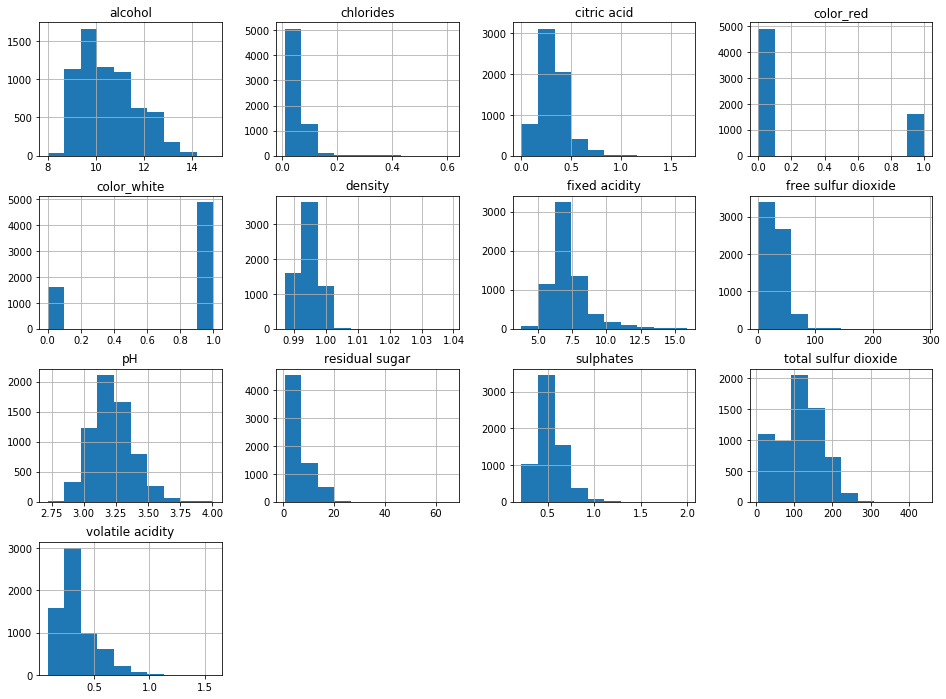

In [12]:
# Histograms for each attribute
attributeOnly.hist()
pyplot.show()

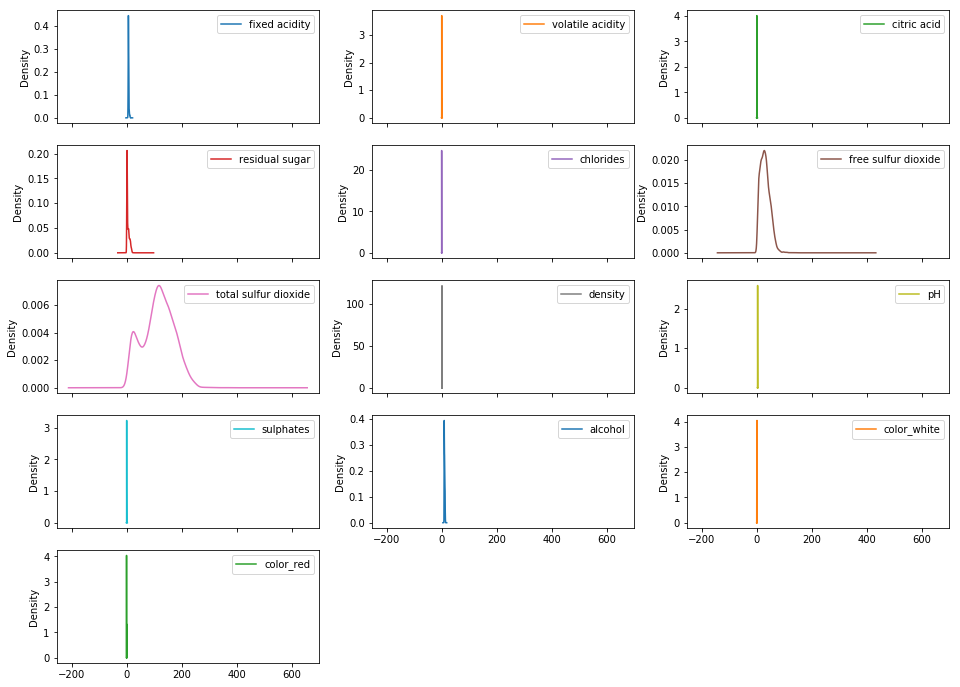

In [13]:
# Density plot for each attribute
attributeOnly.plot(kind='density', subplots=True, layout=(dispRow,dispCol))
pyplot.show()

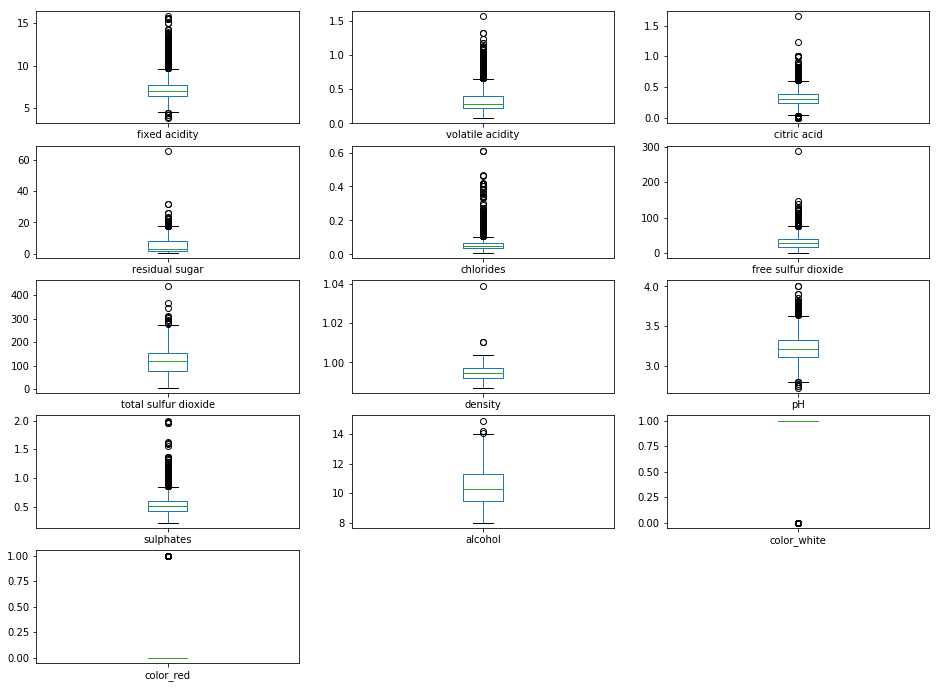

In [14]:
# Box and Whisker plot for each attribute
attributeOnly.plot(kind='box', subplots=True, layout=(dispRow,dispCol))
pyplot.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

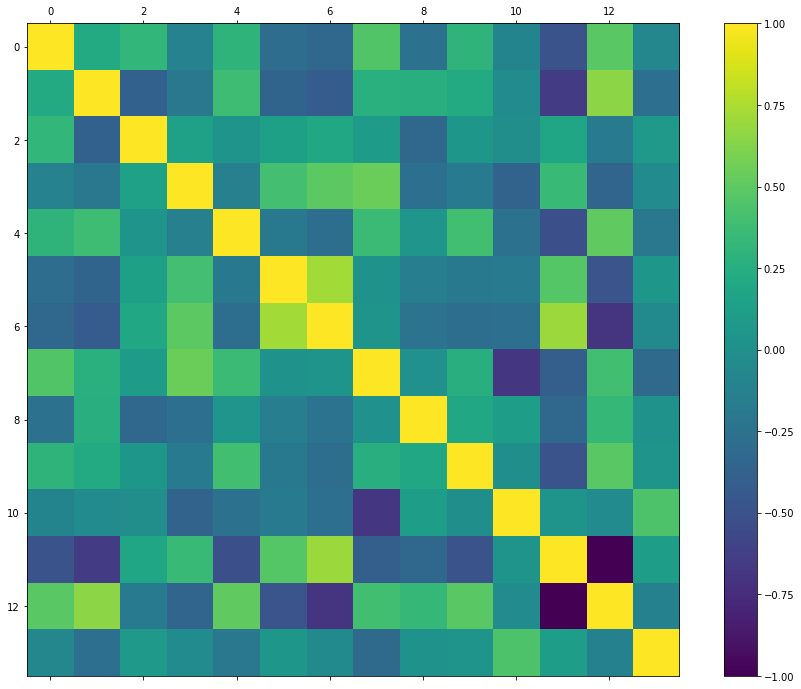

In [15]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(entireDataset.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

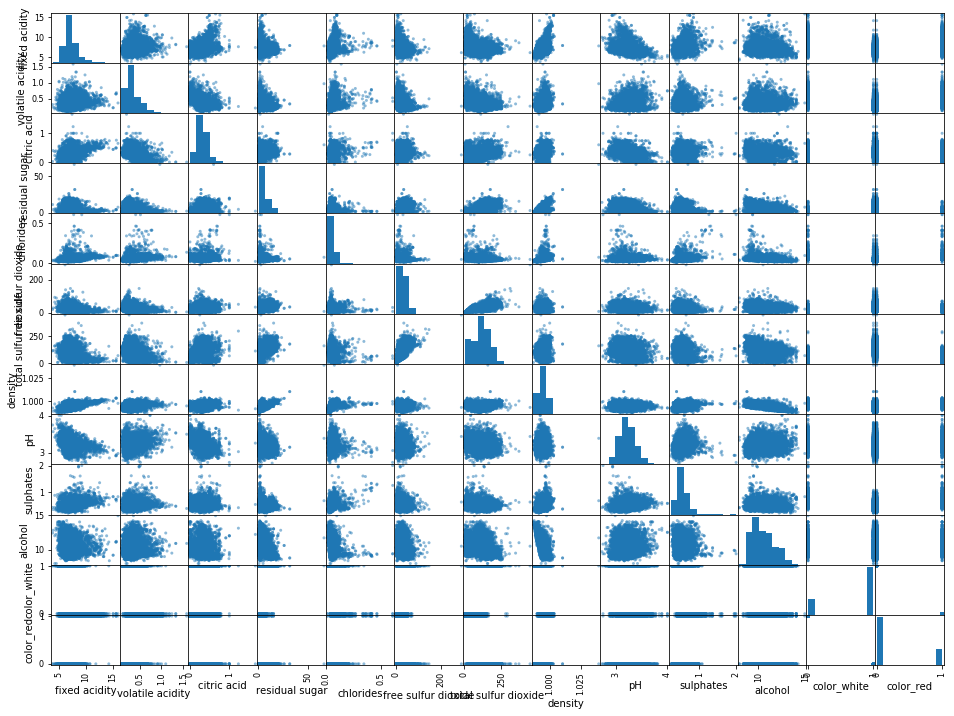

In [16]:
# Scatterplot matrix
scatter_matrix(attributeOnly)
pyplot.show()

## Section 3 - Prepare Data
Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

### 3.a) Data Cleaning

In [17]:
# Not applicable for this iteration of the project.

### 3.b) Feature Selection

In [18]:
# Drop one of the wine color columns as they are colinear
entireDataset.drop('color_red', axis=1, inplace=True)

### 3.c) Data Transforms

In [19]:
# Conver the credit limit attribute into bins
entireDataset = entireDataset.rename(columns={'targetVar': 'quality'})
rating_bins = [0, 4, 6, 10]
rating_labels = [3,2,1]
entireDataset['targetVar'] = pd.cut(entireDataset['quality'], bins=rating_bins, labels=rating_labels)
entireDataset["targetVar"] = entireDataset["targetVar"].astype('int')

# Drop the Credit Limit field after binning
entireDataset.drop('quality', axis=1, inplace=True)
print(entireDataset.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
color_white               int64
targetVar                 int32
dtype: object


### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [20]:
seedNum = 888
totAttr = len(entireDataset.columns)-1
array = entireDataset.values
X_entire = array[:,0:totAttr]
Y_entire = entireDataset['targetVar'].values
validation_size = 0.30
X_train, X_validation, Y_train, Y_validation = train_test_split(X_entire, Y_entire, test_size=validation_size, random_state=seedNum)
print("X_entire.shape: {} Y_entire.shape: {}".format(X_entire.shape, Y_entire.shape))
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_entire.shape: (6497, 12) Y_entire.shape: (6497,)
X_train.shape: (4547, 12) Y_train.shape: (4547,)
X_validation.shape: (1950, 12) Y_validation.shape: (1950,)
Total time for data handling and visualization: 0:00:27.855068


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

For this project, we will evaluate one linear, four non-linear and five ensemble algorithms:

Linear Algorithm: Linear Discriminant Analysis

Non-Linear Algorithms: Decision Trees (CART), Naive Bayes, k-Nearest Neighbors, and Support Vector Machine

Ensemble Algorithms: Bagged Decision Trees, Random Forest, Extra Trees, AdaBoost, and Stochastic Gradient Boosting

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

### 4.a) Set test options and evaluation metric

In [21]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'accuracy'

In [22]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(random_state=seedNum)))
models.append(('BDT', BaggingClassifier(random_state=seedNum)))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
models.append(('ET', ExtraTreesClassifier(random_state=seedNum)))
models.append(('AB', AdaBoostClassifier(random_state=seedNum)))
models.append(('GBM', GradientBoostingClassifier(random_state=seedNum)))
results = []
names = []
metrics = []

In [23]:
# Generate model in turn
for name, model in models:
	startTimeModule = datetime.now()
	kfold = KFold(n_splits=num_folds, random_state=seedNum)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	metrics.append(cv_results.mean())
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	print ('Model training time:',(datetime.now() - startTimeModule))
print ('Average metrics ('+scoring+') from all models:',np.mean(metrics))

LDA: 0.778093 (0.016257)
Model training time: 0:00:00.049970


C:\Users\david.lowe\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


CART: 0.767318 (0.024025)
Model training time: 0:00:00.331809
NB: 0.691658 (0.020672)
Model training time: 0:00:00.025004
KNN: 0.760933 (0.021085)
Model training time: 0:00:00.083936
SVM: 0.789303 (0.024465)
Model training time: 0:00:13.809103
BDT: 0.824056 (0.019123)
Model training time: 0:00:02.466589
RF: 0.821638 (0.021382)
Model training time: 0:00:00.768560
ET: 0.830440 (0.014452)
Model training time: 0:00:00.491720
AB: 0.758957 (0.019918)
Model training time: 0:00:02.004851
GBM: 0.799870 (0.012794)
Model training time: 0:00:09.362645
Average metrics (accuracy) from all models: 0.7822266544028658


### 4.b) Spot-checking baseline algorithms

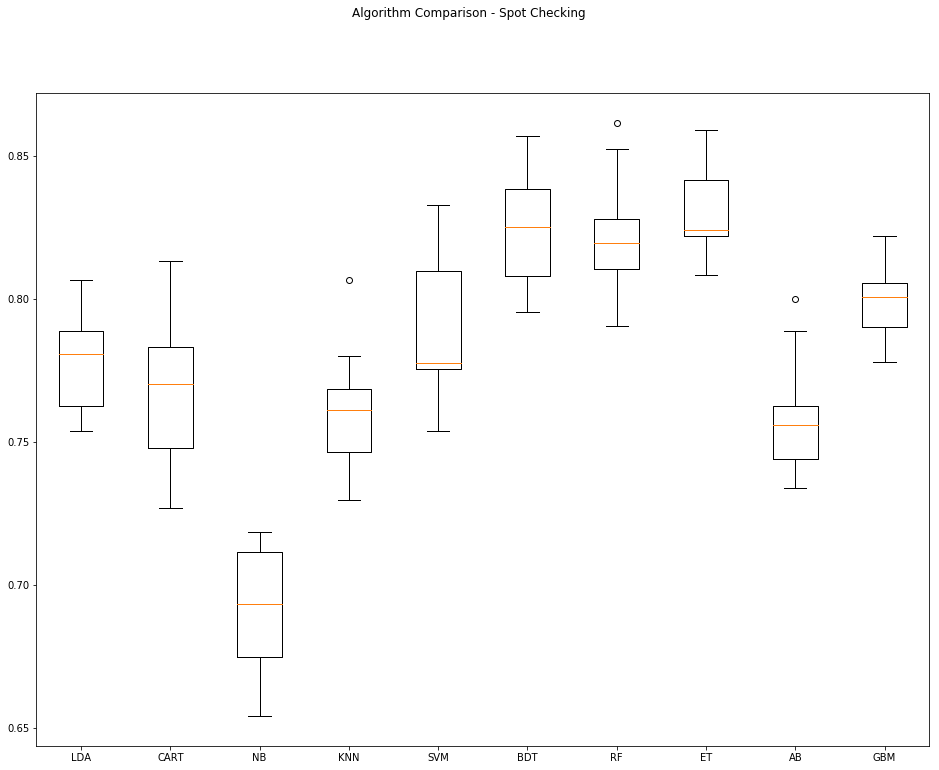

In [24]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 5 - Improve Accuracy
After we achieve a short list of machine learning algorithms with good level of accuracy, we can leverage ways to improve the accuracy of the models.

### 5.a) Algorithm Tuning

In [25]:
# Set up the comparison array
results = []
names = []

In [26]:
# Tuning algorithm #1 - Bagged Decision Trees
startTimeModule = datetime.now()
paramGrid1 = dict(n_estimators=np.array([200,400,600,800,900]))
model1 = BaggingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('BDT')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.844073 using {'n_estimators': 800}
0.842753 (0.015732) with: {'n_estimators': 200}
0.842314 (0.015935) with: {'n_estimators': 400}
0.843633 (0.017179) with: {'n_estimators': 600}
0.844073 (0.016388) with: {'n_estimators': 800}
0.843633 (0.016464) with: {'n_estimators': 900}
Model training time: 0:10:29.744843


In [27]:
# Tuning algorithm #2 - Random Forest
startTimeModule = datetime.now()
paramGrid2 = dict(n_estimators=np.array([200,400,600,800,900]))
model2 = RandomForestClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('RF')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.847592 using {'n_estimators': 900}
0.846712 (0.017297) with: {'n_estimators': 200}
0.846492 (0.016810) with: {'n_estimators': 400}
0.847372 (0.016013) with: {'n_estimators': 600}
0.847152 (0.015790) with: {'n_estimators': 800}
0.847592 (0.016438) with: {'n_estimators': 900}
Model training time: 0:03:33.587858


In [28]:
# Tuning algorithm #3 - Extra Trees
startTimeModule = datetime.now()
paramGrid3 = dict(n_estimators=np.array([200,300,400,500,600]))
model3 = ExtraTreesClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid3 = GridSearchCV(estimator=model3, param_grid=paramGrid3, scoring=scoring, cv=kfold)
grid_result3 = grid3.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
results.append(grid_result3.cv_results_['mean_test_score'])
names.append('ET')
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.847812 using {'n_estimators': 500}
0.845612 (0.018839) with: {'n_estimators': 200}
0.846712 (0.018437) with: {'n_estimators': 300}
0.846712 (0.019433) with: {'n_estimators': 400}
0.847812 (0.021773) with: {'n_estimators': 500}
0.846272 (0.022094) with: {'n_estimators': 600}
Model training time: 0:01:43.921579


### 5.b) Compare Algorithms After Tuning

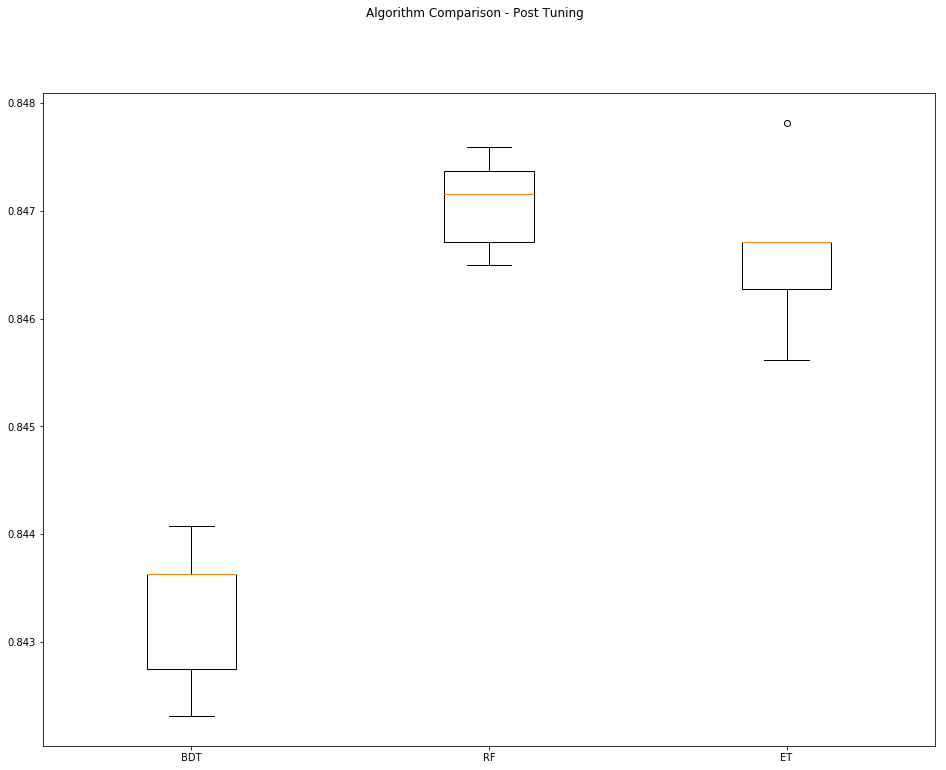

In [29]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 6 - Finalize Model
Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:
* Using an optimal model tuned to make predictions on unseen data.
* Creating a standalone model using the tuned parameters
* Saving an optimal model to file for later use.

### 6.a) Predictions on validation dataset

In [30]:
model = ExtraTreesClassifier(n_estimators=500, random_state=seedNum)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.86
[[ 222  164    0]
 [  46 1447    1]
 [   0   62    8]]
             precision    recall  f1-score   support

          1       0.83      0.58      0.68       386
          2       0.86      0.97      0.91      1494
          3       0.89      0.11      0.20        70

avg / total       0.86      0.86      0.84      1950



### 6.b) Create standalone model on entire training dataset

In [31]:
startTimeModule = datetime.now()
finalModel = ExtraTreesClassifier(n_estimators=500)
finalModel.fit(X_entire, Y_entire)
print ('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:00:03.404052


### 6.c) Save model for later use

In [32]:
# modelName = 'finalModel_BinaryClass.sav'
# dump(finalModel, modelName)

print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:16:51.258626
